In [19]:
!pip install watermark
!pip install wget
!pip install mpl_finance

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import wget
import numpy as np
import pandas as pd
import watermark
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller


%matplotlib inline
%load_ext watermark

In [21]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

scipy     : 1.11.3
watermark : 2.4.3
numpy     : 1.23.5
pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
wget      : 3.2



In [22]:
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/BAC.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/C.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/WFC.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/JPM.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/SP500.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/IndexUSD.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/cb-consumer-confidence.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/cpi.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/GDP.xlsx')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/rate_desicion.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/trade-balance.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/unemployment.csv')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/Industry PMI.xlsx')
wget.download('https://raw.githubusercontent.com/garasev/Stockify/main/data/Service PMI.xlsx')


'Service PMI.xlsx'

# Очистка данных, приведение в рабочее состояние

## GDP

In [23]:
GDP = pd.read_excel('GDP.xlsx')
GDP['date'] = pd.to_datetime(GDP['date'], format='%d-%m-%Y')
# Удаление ненужных колонок
GDP = GDP[['date', 'Nominal GDP Index', 'Real GDP Index']]
GDP.head()

,date,Nominal GDP Index,Real GDP Index
0,2020-01-01,22015.312813,20959.675271
1,2020-02-01,22119.357184,21057.624317
2,2020-03-01,20984.869002,19980.245161
3,2020-04-01,18943.037407,18153.868201
4,2020-05-01,19820.181691,18962.320501


## CPI

In [24]:
CPI = pd.read_csv('cpi.csv', sep='"', decimal=',')
CPI = CPI['date, "value"'].str.split(',', expand=True)
CPI.head()

,0,1,2
0,10.2023,"""3","7%"""
1,09.2023,"""3","7%"""
2,08.2023,"""3","7%"""
3,07.2023,"""3","2%"""
4,06.2023,"""3","0%"""


In [25]:
CPI['date'] = pd.to_datetime(CPI[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
CPI[1] = CPI[1].str.replace('"', '').astype('float')
CPI[2] = CPI[2].str.replace('"', '')
CPI[2] = CPI[2].str.rstrip('%').astype('float')
CPI['value'] = (CPI[1] + CPI[2]/10)
# Удаление ненужных колонок
CPI = CPI[['date', 'value']]

CPI.head()


,date,value
0,2023-10-01,3.7
1,2023-09-01,3.7
2,2023-08-01,3.7
3,2023-07-01,3.2
4,2023-06-01,3.0


## Rate Desicion

In [26]:
RD = pd.read_csv('rate_desicion.csv', sep='"', decimal=',')
RD = RD['date, "value"'].str.split(',', expand=True)
RD.head()

,0,1,2
0,10.2023,"""5","50%"""
1,09.2023,"""5","50%"""
2,08.2023,"""5","50%"""
3,07.2023,"""5","50%"""
4,06.2023,"""5","25%"""


In [27]:
RD['date'] = pd.to_datetime(RD[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
RD[1] = RD[1].str.replace('"', '').astype('float')
RD[2] = RD[2].str.replace('"', '')
RD[2] = RD[2].str.rstrip('%').astype('float')
RD['value'] = (RD[1] + RD[2]/100)
# Удаление ненужных колонок
RD = RD[['date', 'value']]

RD.head()


,date,value
0,2023-10-01,5.50
1,2023-09-01,5.50
2,2023-08-01,5.50
3,2023-07-01,5.50
4,2023-06-01,5.25


## Unemployment

In [28]:
UnEm = pd.read_csv('unemployment.csv', sep='"', decimal=',')
# Убираем кавычки вокруг столбца "value" и преобразуем его в числовой формат
UnEm = UnEm['date, "value"'].str.split(',', expand=True)
UnEm.head()

,0,1,2
0,10.2023,"""3","9%"""
1,09.2023,"""3","8%"""
2,08.2023,"""3","8%"""
3,07.2023,"""3","5%"""
4,06.2023,"""3","6%"""


In [29]:
UnEm['date'] = pd.to_datetime(UnEm[0], format='%m.%Y')

# Создание новой колонки 'value' из цифр первой и второй колонок
UnEm[1] = UnEm[1].str.replace('"', '').astype('float')
UnEm[2] = UnEm[2].str.replace('"', '')
UnEm[2] = UnEm[2].str.rstrip('%').astype('float')
UnEm['value'] = (UnEm[1] + UnEm[2]/10)
# Удаление ненужных колонок
UnEm = UnEm[['date', 'value']]

UnEm.head()


,date,value
0,2023-10-01,3.9
1,2023-09-01,3.8
2,2023-08-01,3.8
3,2023-07-01,3.5
4,2023-06-01,3.6


## S&P 500

In [30]:
SP500 = pd.read_csv('SP500.csv', sep='"', decimal=',')
# Убираем кавычки вокруг столбца "value" и преобразуем его в числовой формат
# SP500 = SP500['date, "value"'].str.split(',', expand=True)
SP500 = SP500[['Дата,', 'Цена']]
SP500['date'] = SP500['Дата,'].str.replace(',', '')
SP500['date'] = pd.to_datetime(SP500['date'].str.strip(), format='%d.%m.%Y')
SP500['value'] = SP500['Цена'].str.replace('.', '')
SP500['value'] = SP500['value'].str.replace(',', '.').astype(float)
SP500 = SP500[['date', 'value']]
SP500.head()

<ipython-input-30-4ff985d5ffd7>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SP500['value'] = SP500['Цена'].str.replace('.', '')


,date,value
0,2023-10-31,4193.80
1,2023-10-30,4166.82
2,2023-10-27,4117.37
3,2023-10-26,4137.23
4,2023-10-25,4186.77


## Consumer Confidence

In [31]:
ConConf = pd.read_csv('cb-consumer-confidence.csv', sep='"', decimal=',')
ConConf['date'] = ConConf['date, '].str.replace(',', '')
ConConf['date'] = pd.to_datetime(ConConf['date'].str.strip(), format='%m.%Y')
ConConf = ConConf[['date', 'value']]
ConConf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    46 non-null     datetime64[ns]
 1   value   46 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 864.0 bytes


## PMI

In [32]:
Industry = pd.read_excel('Industry PMI.xlsx')
Service = pd.read_excel('Service PMI.xlsx')
Industry.rename(columns = {'Release Date':'date'}, inplace = True)
Service.rename(columns = {'ReleaseDate':'date'}, inplace = True)

Industry.head()

,date,Actual
0,2023-10-24,50.0
1,2023-10-02,49.8
2,2023-09-22,48.9
3,2023-09-01,47.9
4,2023-08-23,47.0


In [33]:
Service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    92 non-null     datetime64[ns]
 1   Actual  92 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


## Trade Balance


In [34]:
trade_balance = pd.read_csv('trade-balance.csv', sep='"', decimal=',')
trade_balance['date'] = trade_balance['date, '].str.replace(',', '')
trade_balance['date'] = pd.to_datetime(trade_balance['date'].str.strip(), format='%m.%Y')
trade_balance = trade_balance[['date', 'value']]
trade_balance.describe()

,value
count,46.000000
mean,-68.376087
std,13.489917
min,-109.800000
25%,-74.550000
50%,-68.250000
75%,-63.675000
max,-39.900000


## Index USD

In [35]:
index_usd = pd.read_csv('IndexUSD.csv', sep='"', decimal=',')
index_usd['date'] = index_usd['Дата,'].str.replace(',', '')
index_usd['date'] = pd.to_datetime(index_usd['date'].str.strip(), format='%d.%m.%Y')
index_usd['value'] = index_usd['Цена']
index_usd = index_usd[['date', 'value']]
index_usd.head()

,date,value
0,2023-10-31,106.66
1,2023-10-30,106.12
2,2023-10-27,106.56
3,2023-10-26,106.60
4,2023-10-25,106.53


## Bank of America

In [36]:
BAC = pd.read_csv('BAC.csv', sep='"', decimal=',')
columns_names = list(BAC.columns.values)
print(columns_names)
BAC

['Дата,', 'Цена', ',', 'Откр.', ',.1', 'Макс.', ',.2', 'Мин.', ',.3', 'Объём', ',.4', 'Изм. %', 'Unnamed: 12']


,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,"08.01.2020,",34.97,",",34.57,",",35.19,",",34.55,",","45,34M",",","1,01%",NaN
961,"07.01.2020,",34.62,",",34.70,",",34.92,",",34.53,",","34,35M",",","-0,66%",NaN
962,"06.01.2020,",34.85,",",34.41,",",34.90,",",34.37,",","42,23M",",","-0,14%",NaN
963,"03.01.2020,",34.90,",",34.98,",",35.15,",",34.76,",","50,76M",",","-2,08%",NaN


In [37]:
# Приводим "date" в нормальный вид
BAC['date'] = BAC[columns_names[0]].str.replace(',', '')
BAC['date'] = pd.to_datetime(BAC['date'].str.strip(), format='%d.%m.%Y')
BAC.head()

,"Дата,",Цена,",",Откр.,",.1",Макс.,",.2",Мин.,",.3",Объём,",.4",Изм. %,Unnamed: 12,date
0,"31.10.2023,",26.34,",",25.74,",",26.38,",",25.72,",","49,57M",",","2,53%",NaN,2023-10-31
1,"30.10.2023,",25.69,",",25.32,",",25.78,",",25.28,",","41,22M",",","2,07%",NaN,2023-10-30
2,"27.10.2023,",25.17,",",26.07,",",26.07,",",24.96,",","64,71M",",","-3,64%",NaN,2023-10-27
3,"26.10.2023,",26.12,",",25.49,",",26.36,",",25.44,",","60,32M",",","2,23%",NaN,2023-10-26
4,"25.10.2023,",25.55,",",25.38,",",25.65,",",25.18,",","45,16M",",","0,31%",NaN,2023-10-25


In [38]:
BAC = BAC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
BAC = BAC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

BAC['Volume'] = BAC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
BAC['Changes(%)'] = BAC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
BAC

,Close,Open,Max,Min,Volume,Changes(%),date
0,26.34,25.74,26.38,25.72,4957.0,2.53,2023-10-31
1,25.69,25.32,25.78,25.28,4122.0,2.07,2023-10-30
2,25.17,26.07,26.07,24.96,6471.0,-3.64,2023-10-27
3,26.12,25.49,26.36,25.44,6032.0,2.23,2023-10-26
4,25.55,25.38,25.65,25.18,4516.0,0.31,2023-10-25
...,...,...,...,...,...,...,...
960,34.97,34.57,35.19,34.55,4534.0,1.01,2020-01-08
961,34.62,34.70,34.92,34.53,3435.0,-0.66,2020-01-07
962,34.85,34.41,34.90,34.37,4223.0,-0.14,2020-01-06
963,34.90,34.98,35.15,34.76,5076.0,-2.08,2020-01-03


In [39]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Close       965 non-null    float64       
 1   Open        965 non-null    float64       
 2   Max         965 non-null    float64       
 3   Min         965 non-null    float64       
 4   Volume      965 non-null    float64       
 5   Changes(%)  965 non-null    float64       
 6   date        965 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 52.9 KB


## Citi

In [40]:
Citi = pd.read_csv('C.csv', sep='"', decimal=',')
columns_names = list(Citi.columns.values)


# дату в нормальный вид
Citi['date'] = Citi[columns_names[0]].str.replace(',', '')
Citi['date'] = pd.to_datetime(Citi['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
Citi = Citi.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
Citi = Citi.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

Citi['Volume'] = Citi['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
Citi['Changes(%)'] = Citi['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
Citi

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.49,39.04,39.53,38.92,1627.0,1.44,2023-10-31
1,38.93,38.55,38.97,38.41,2065.0,1.80,2023-10-30
2,38.24,39.33,39.37,38.17,2065.0,-2.80,2023-10-27
3,39.34,38.50,39.75,38.47,2492.0,1.89,2023-10-26
4,38.61,38.70,38.85,38.26,1508.0,-0.82,2023-10-25
...,...,...,...,...,...,...,...
960,79.36,78.77,80.00,78.68,1129.0,0.76,2020-01-08
961,78.76,79.29,79.30,78.73,1049.0,-0.87,2020-01-07
962,79.45,78.72,79.55,78.72,1007.0,-0.31,2020-01-06
963,79.70,79.80,80.52,79.45,1266.0,-1.88,2020-01-03


## JPM

In [41]:
JPM = pd.read_csv('JPM.csv', sep='"', decimal=',')
columns_names = list(JPM.columns.values)


# дату в нормальный вид
JPM['date'] = JPM[columns_names[0]].str.replace(',', '')
JPM['date'] = pd.to_datetime(JPM['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
JPM = JPM.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
JPM = JPM.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

JPM['Volume'] = JPM['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
JPM['Changes(%)'] = JPM['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
JPM

,Close,Open,Max,Min,Volume,Changes(%),date
0,139.06,137.71,139.24,137.47,902.0,1.19,2023-10-31
1,137.42,136.44,138.04,136.04,882.0,1.27,2023-10-30
2,135.69,138.95,139.10,135.19,1743.0,-3.60,2023-10-27
3,140.76,139.76,141.66,139.43,900.0,0.26,2023-10-26
4,140.40,140.57,141.18,139.51,732.0,-0.55,2023-10-25
...,...,...,...,...,...,...,...
960,136.94,135.70,137.58,135.60,970.0,0.78,2020-01-08
961,135.88,137.28,137.86,135.82,1058.0,-1.70,2020-01-07
962,138.23,136.56,138.27,136.50,1027.0,-0.08,2020-01-06
963,138.34,137.50,139.23,137.08,1039.0,-1.95,2020-01-03


## WFC

In [42]:
WFC = pd.read_csv('WFC.csv', sep='"', decimal=',')
columns_names = list(WFC.columns.values)


# дату в нормальный вид
WFC['date'] = WFC[columns_names[0]].str.replace(',', '')
WFC['date'] = pd.to_datetime(WFC['date'].str.strip(), format='%d.%m.%Y')

# удаляем мусор
WFC = WFC.drop(columns=columns_names[::2], axis = 1)
# Обработка столбцов: удаление запятых, кавычек и преобразование в float
WFC = WFC.rename(columns={
    'Цена': 'Close',
    'Откр.': 'Open',
    'Макс.': 'Max',
    'Мин.': 'Min',
    'Объём': 'Volume',
    'Изм. %': 'Changes(%)'})

WFC['Volume'] = WFC['Volume'].str.replace(',', '').str.replace('M', '').astype(float)
WFC['Changes(%)'] = WFC['Changes(%)'].str.replace(',', '').str.replace('%', '').astype(float)/100
WFC

,Close,Open,Max,Min,Volume,Changes(%),date
0,39.77,39.64,39.81,39.24,1075.0,0.86,2023-10-31
1,39.43,39.10,39.59,38.69,1168.0,1.73,2023-10-30
2,38.76,39.38,39.41,38.62,1358.0,-2.24,2023-10-27
3,39.65,39.02,39.97,38.98,1436.0,1.59,2023-10-26
4,39.03,39.07,39.21,38.58,1383.0,-0.64,2023-10-25
...,...,...,...,...,...,...,...
960,52.82,52.84,53.33,52.80,1659.0,0.30,2020-01-08
961,52.66,53.05,53.05,52.47,1329.0,-0.83,2020-01-07
962,53.10,52.74,53.20,52.72,1320.0,-0.60,2020-01-06
963,53.42,53.11,53.62,52.90,1561.0,-0.61,2020-01-03


## Сведение в единый датафрейм

In [43]:
union_df = pd.DataFrame()
union_df['date'] = WFC['date']

union_df['WFC_Close'] = WFC['Close']
union_df['WFC_Volume'] = WFC['Volume']
#all_df['WFC_Changes(%)'] = WFC['Changes(%)']

union_df['JPM_Close'] = JPM['Close']
union_df['JPM_Volume'] = JPM['Volume']
#all_df['JPM_Changes(%)'] = JPM['Changes(%)']

union_df['Citi_Close'] = Citi['Close']
union_df['Citi_Volume'] = Citi['Volume']
#all_df['Citi_Changes(%)'] = Citi['Changes(%)']

union_df['BAC_Close'] = BAC['Close']
union_df['BAC_Volume'] = BAC['Volume']
#all_df['BAC_Changes(%)'] = BAC['Changes(%)']

union_df['S&P_500'] = SP500['value']
union_df = pd.merge(union_df, index_usd, on='date', how='left')
union_df.rename(columns = {'value':'Index USD'}, inplace = True)



UnEm['date'] = pd.to_datetime(UnEm['date'])
union_df["UnEm"] = np.nan
union_df["Nominal GDP Index"] = np.nan
union_df["Real GDP Index"] = np.nan
union_df["CPI"] = np.nan
union_df["RD"] = np.nan
union_df["Trade Balance"] = np.nan
union_df["Consumer Confidence"] = np.nan
union_df['Industry PMI'] = np.nan
union_df['Service PMI'] = np.nan


for i in range(len(UnEm) - 1):
    end_date = UnEm.loc[i,'date']
    start_date = UnEm.loc[i + 1,'date']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'UnEm'] = UnEm.loc[i,'value']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Nominal GDP Index'] = GDP.loc[i,'Nominal GDP Index']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Real GDP Index'] = GDP.loc[i,'Real GDP Index']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'CPI'] = CPI.loc[i,'value']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'RD'] = RD.loc[i,'value']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Trade Balance'] = trade_balance.loc[i,'value']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Consumer Confidence'] = ConConf.loc[i,'value']


for i in range(len(Industry) - 1):
    end_date = Industry.loc[i,'date']
    start_date = Industry.loc[i + 1,'date']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Industry PMI'] = Industry.loc[i,'Actual']
    union_df.loc[(union_df['date'] >= start_date) & (union_df['date'] <= end_date), 'Service PMI'] = Service.loc[i,'Actual']



union_df.info()
union_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 964
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 965 non-null    datetime64[ns]
 1   WFC_Close            965 non-null    float64       
 2   WFC_Volume           965 non-null    float64       
 3   JPM_Close            965 non-null    float64       
 4   JPM_Volume           965 non-null    float64       
 5   Citi_Close           965 non-null    float64       
 6   Citi_Volume          965 non-null    float64       
 7   BAC_Close            965 non-null    float64       
 8   BAC_Volume           965 non-null    float64       
 9   S&P_500              965 non-null    float64       
 10  Index USD            965 non-null    float64       
 11  UnEm                 965 non-null    float64       
 12  Nominal GDP Index    965 non-null    float64       
 13  Real GDP Index       965 non-null  

,WFC_Close,WFC_Volume,JPM_Close,JPM_Volume,Citi_Close,Citi_Volume,BAC_Close,BAC_Volume,S&P_500,Index USD,UnEm,Nominal GDP Index,Real GDP Index,CPI,RD,Trade Balance,Consumer Confidence,Industry PMI,Service PMI
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,960.000000,960.000000
mean,40.468746,2855.043523,132.583047,1437.167876,55.547503,2134.220725,33.612228,5321.493264,3941.266736,98.738259,5.668497,25028.165867,21677.293949,4.003109,1.280311,-65.476788,102.765492,53.270625,52.639583
std,8.783035,1526.837789,22.280030,738.061454,11.526027,892.174228,7.093467,2400.997506,518.937328,5.978603,2.645379,1983.676278,614.949687,2.774127,1.802754,9.646205,12.408605,5.868922,7.278134
min,21.140000,491.000000,79.030000,322.000000,35.390000,682.000000,18.080000,1612.000000,2237.400000,89.440000,3.500000,21899.725179,20626.059553,0.100000,0.250000,-78.200000,84.800000,36.100000,27.000000
25%,36.610000,1751.000000,115.820000,952.000000,46.150000,1514.000000,28.160000,3827.000000,3662.450000,93.130000,3.500000,24582.300735,21783.851053,1.400000,0.250000,-67.100000,88.600000,49.200000,49.400000
50%,42.640000,2481.000000,136.450000,1244.000000,51.420000,1943.000000,33.370000,4711.000000,4027.810000,98.300000,3.900000,26462.859847,22011.033866,2.300000,0.250000,-67.100000,108.300000,52.400000,53.700000
75%,46.630000,3552.000000,150.970000,1640.000000,66.670000,2522.000000,38.910000,5979.000000,4358.240000,103.520000,6.700000,26462.859847,22011.033866,7.000000,1.250000,-63.100000,115.800000,58.500000,57.500000
max,59.060000,11895.000000,171.780000,5442.000000,81.910000,8657.000000,49.380000,21840.000000,4796.560000,114.110000,14.700000,27832.404974,22546.406263,7.000000,4.500000,-39.900000,130.700000,63.400000,70.400000


In [44]:
union_df[['Industry PMI','Service PMI']].head(10)

,Industry PMI,Service PMI
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,50.0,50.9
6,50.0,50.9
7,50.0,50.9
8,50.0,50.9
9,50.0,50.9


In [45]:
union_df['Industry PMI'] = union_df['Industry PMI'].fillna(50.0)
union_df['Service PMI'] = union_df['Service PMI'].fillna(50.9)

In [46]:
union_df.head()

,date,WFC_Close,WFC_Volume,JPM_Close,JPM_Volume,Citi_Close,Citi_Volume,BAC_Close,BAC_Volume,S&P_500,Index USD,UnEm,Nominal GDP Index,Real GDP Index,CPI,RD,Trade Balance,Consumer Confidence,Industry PMI,Service PMI
0,2023-10-31,39.77,1075.0,139.06,902.0,39.49,1627.0,26.34,4957.0,4193.80,106.66,3.5,21899.725179,20626.059553,6.5,4.5,-78.2,108.3,50.0,50.9
1,2023-10-30,39.43,1168.0,137.42,882.0,38.93,2065.0,25.69,4122.0,4166.82,106.12,3.5,21899.725179,20626.059553,6.5,4.5,-78.2,108.3,50.0,50.9
2,2023-10-27,38.76,1358.0,135.69,1743.0,38.24,2065.0,25.17,6471.0,4117.37,106.56,3.5,21899.725179,20626.059553,6.5,4.5,-78.2,108.3,50.0,50.9
3,2023-10-26,39.65,1436.0,140.76,900.0,39.34,2492.0,26.12,6032.0,4137.23,106.60,3.5,21899.725179,20626.059553,6.5,4.5,-78.2,108.3,50.0,50.9
4,2023-10-25,39.03,1383.0,140.40,732.0,38.61,1508.0,25.55,4516.0,4186.77,106.53,3.5,21899.725179,20626.059553,6.5,4.5,-78.2,108.3,50.0,50.9


#  EDA

## GDP

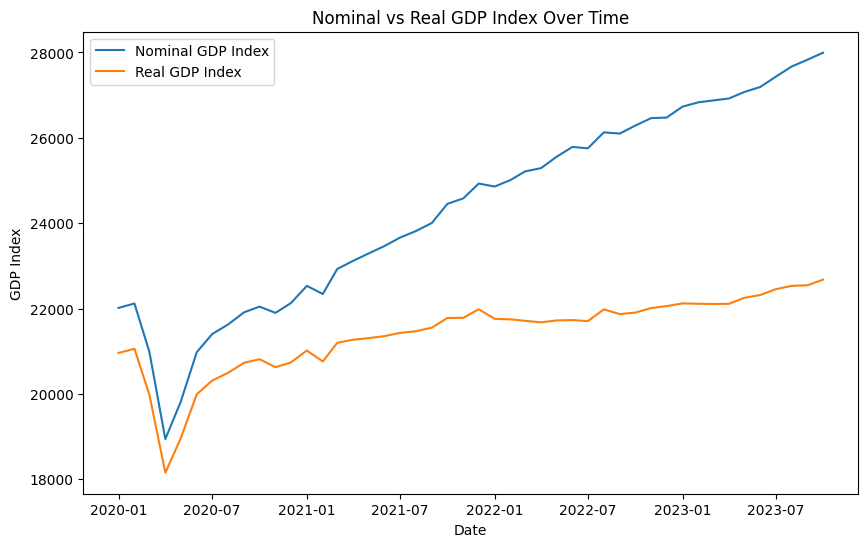

In [47]:
plt.figure(figsize=(10, 6))

# Построение графика для Nominal GDP Index
plt.plot(GDP['date'], GDP['Nominal GDP Index'], label='Nominal GDP Index')

# Построение графика для Real GDP Index
plt.plot(GDP['date'], GDP['Real GDP Index'], label='Real GDP Index')

# Добавление заголовка и подписей осей
plt.title('Nominal vs Real GDP Index Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Index')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Возможно, имеет смысл объединить датафреймы, содержащие макроэкономические данные (однако стоит отметить тот факт, что данные выходят в разные дни и необходимо отразить изменения в датафрейме)

Построим свечной график для всех цен для каждой компании

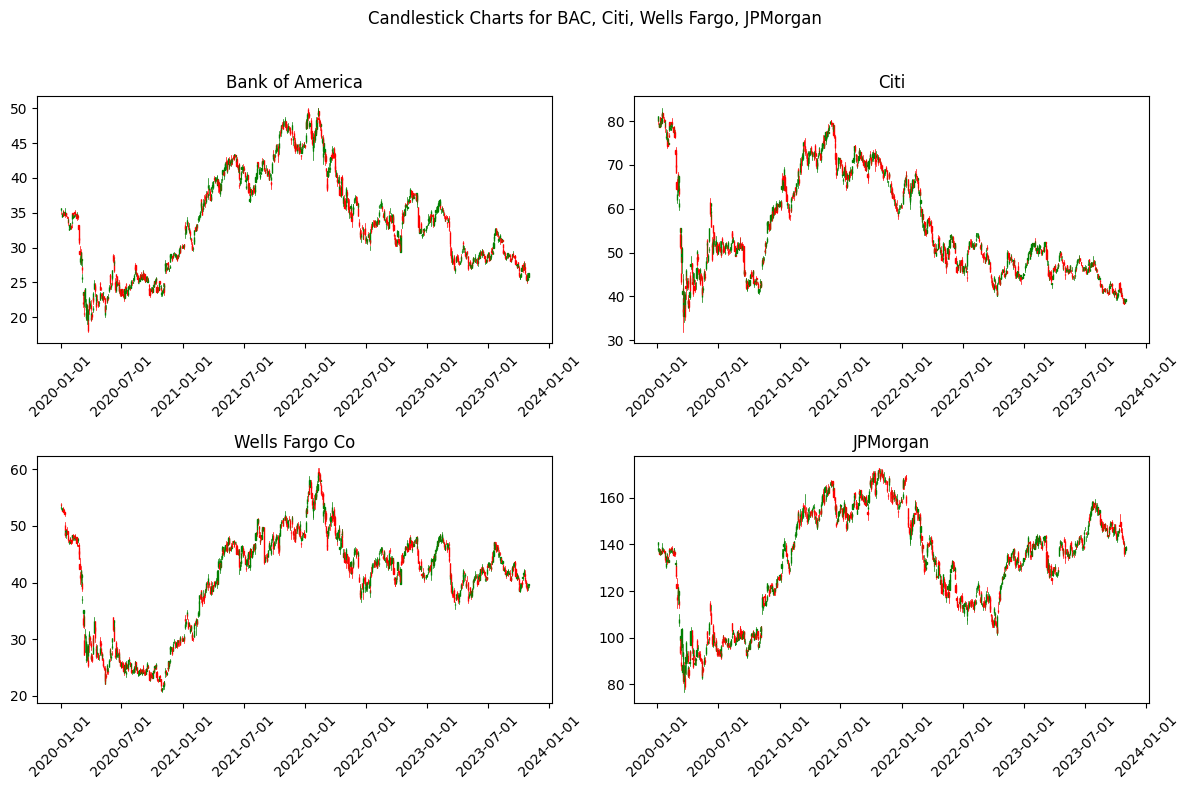

In [48]:

# График для Bank of America
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# График для BAC
axs[0, 0].set_title('Bank of America')
candlestick_ohlc(axs[0, 0], zip(mdates.date2num(BAC['date']), BAC['Open'], BAC['Max'], BAC['Min'], BAC['Close']), width=0.6, colorup='g', colordown='r')

# График для Citi
axs[0, 1].set_title('Citi')
candlestick_ohlc(axs[0, 1], zip(mdates.date2num(Citi['date']), Citi['Open'], Citi['Max'], Citi['Min'], Citi['Close']), width=0.6, colorup='g', colordown='r')

# График для Wells Fargo
axs[1, 0].set_title('Wells Fargo Co')
candlestick_ohlc(axs[1, 0], zip(mdates.date2num(WFC['date']), WFC['Open'], WFC['Max'], WFC['Min'], WFC['Close']), width=0.6, colorup='g', colordown='r')

# График для JPMorgan
axs[1, 1].set_title('JPMorgan')
candlestick_ohlc(axs[1, 1], zip(mdates.date2num(JPM['date']), JPM['Open'], JPM['Max'], JPM['Min'], JPM['Close']), width=0.6, colorup='g', colordown='r')

# Добавим форматирование осей дат
for ax in axs.flat:
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Добавим общий заголовок
plt.suptitle('Candlestick Charts for BAC, Citi, Wells Fargo, JPMorgan')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

матрица корреляций

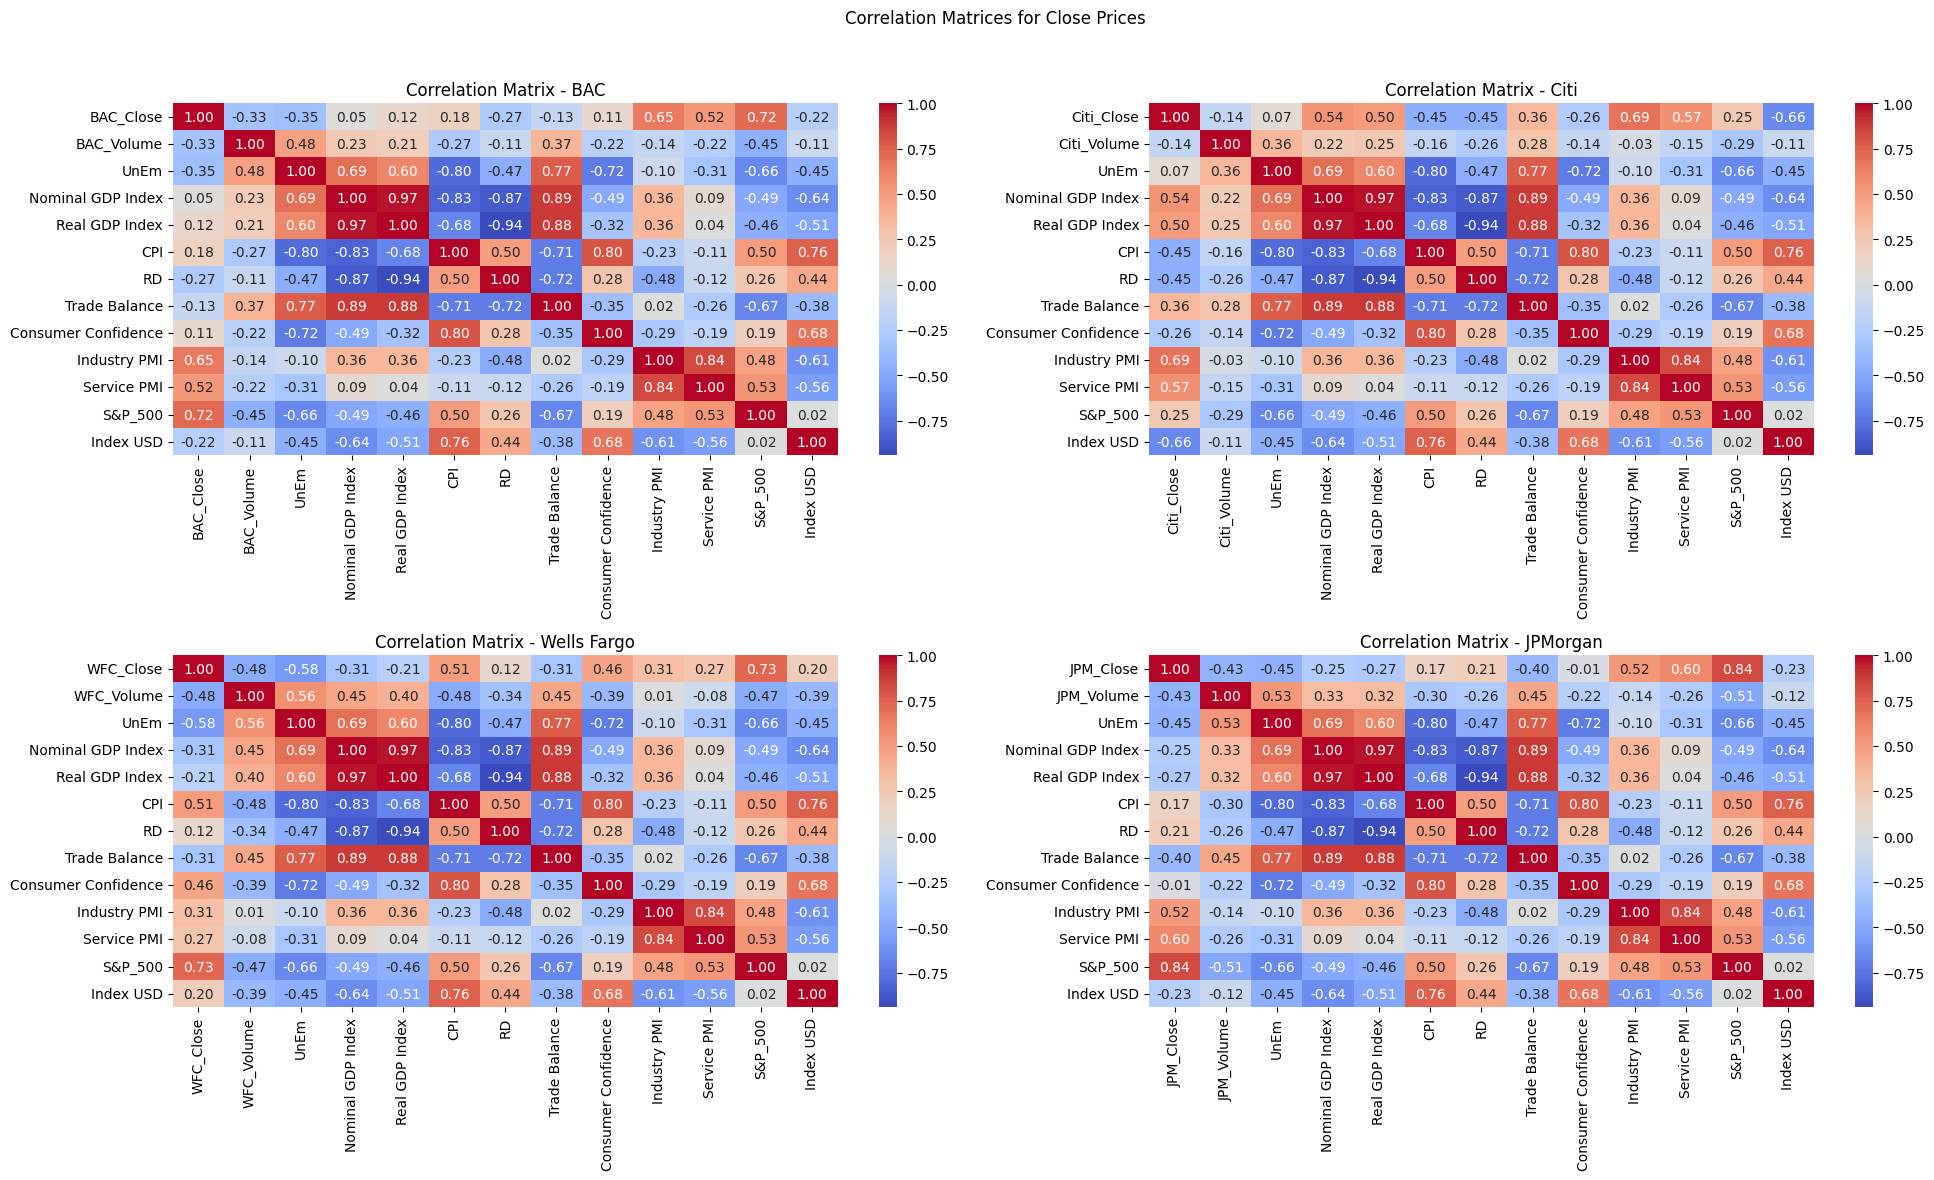

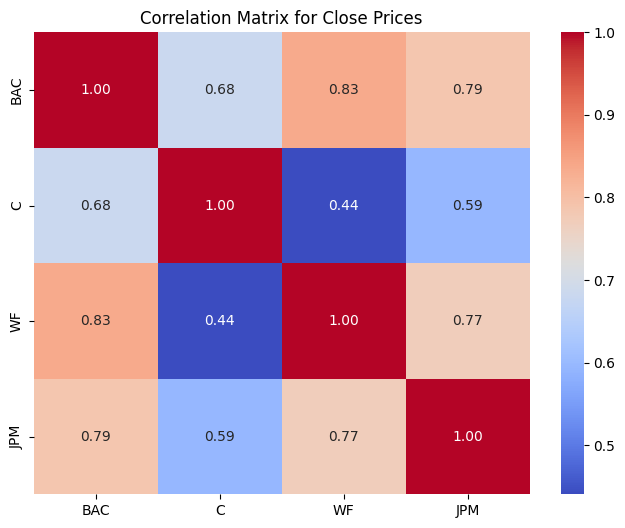

In [55]:
# Создадим матрицу корреляции цен закрытия для каждого датафрейма
corr_WFC = union_df[['WFC_Close',
                     'WFC_Volume',
                     'UnEm',
                     'Nominal GDP Index',
                     'Real GDP Index',
                     'CPI',
                     'RD',
                     'Trade Balance',
                     'Consumer Confidence',
                     'Industry PMI',
                     'Service PMI',
                     'S&P_500',
                     'Index USD']].corr()


corr_JPM = union_df[['JPM_Close',
                     'JPM_Volume',
                     'UnEm',
                     'Nominal GDP Index',
                     'Real GDP Index',
                     'CPI',
                     'RD',
                     'Trade Balance',
                     'Consumer Confidence',
                     'Industry PMI',
                     'Service PMI',
                     'S&P_500',
                     'Index USD']].corr()


corr_Citi = union_df[['Citi_Close',
                      'Citi_Volume',
                      'UnEm',
                      'Nominal GDP Index',
                      'Real GDP Index',
                      'CPI',
                      'RD',
                      'Trade Balance',
                      'Consumer Confidence',
                      'Industry PMI',
                      'Service PMI',
                      'S&P_500',
                      'Index USD']].corr()


corr_BAC = union_df[['BAC_Close',
                     'BAC_Volume',
                     'UnEm',
                     'Nominal GDP Index',
                     'Real GDP Index',
                     'CPI',
                     'RD',
                     'Trade Balance',
                     'Consumer Confidence',
                     'Industry PMI',
                     'Service PMI',
                     'S&P_500',
                     'Index USD']].corr()

# Создадим матрицу корреляции между целевыми переменными (ценами закрытия) каждого датафрейма
corr_close = pd.concat([BAC['Close'], Citi['Close'], WFC['Close'], JPM['Close']], axis=1)
corr_close.columns = ['BAC', 'C', 'WF', 'JPM']
corr_close_matrix = corr_close.corr()

# Построим тепловые карты
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Тепловая карта для BAC
sns.heatmap(corr_BAC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 0])
axs[0, 0].set_title('Correlation Matrix - BAC')

# Тепловая карта для Citi
sns.heatmap(corr_Citi, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[0, 1])
axs[0, 1].set_title('Correlation Matrix - Citi')

# Тепловая карта для Wells Fargo
sns.heatmap(corr_WFC, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 0])
axs[1, 0].set_title('Correlation Matrix - Wells Fargo')

# Тепловая карта для JPMorgan
sns.heatmap(corr_JPM, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix - JPMorgan')

# Добавим общий заголовок
plt.suptitle('Correlation Matrices for Close Prices')

# Регулировка расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Отображение графиков
plt.show()

# Тепловая карта для корреляции между ценами закрытия
plt.figure(figsize=(8, 6))
sns.heatmap(corr_close_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Close Prices')
plt.show()

Рассматривая матрицы корреляций можно сделать следующие выводы:

1. достаточно слабая корреляция между стоимостями акций Citi и Wells Fargo, однако другие связи достаточно сильные (например для пары Wells Fargo & Bank of America к.к. составляет 0.84)
2. сильно коррелируют между собой признаки Real GDP, Nominal GDP и RD. такая связь возникает из-за специфики расчета данных показателей, RD и Nominal GDP имеют меньшую связь, поэтому можно попробовать создать новый признак - отклонение (процентное или абсолютное) номинального от реального ВВП
3. удалить Nominal GDP имеющий почти нулевую связь почти с каждой целевой переменной.
4. Сильную свзяь с Целевыми переменными имеет индекс S&P 500 (это объясняется в т.ч. тем, что данные компании входят в данный индекс)

In [59]:
union_df['Nominal_GDP_deviation(%)'] = round((union_df['Nominal GDP Index'] / union_df['Real GDP Index'] - 1)*100, 2)

In [60]:
union_df['Nominal_GDP_deviation(%)'].head()

0    6.18
1    6.18
2    6.18
3    6.18
4    6.18
Name: Nominal_GDP_deviation(%), dtype: float64

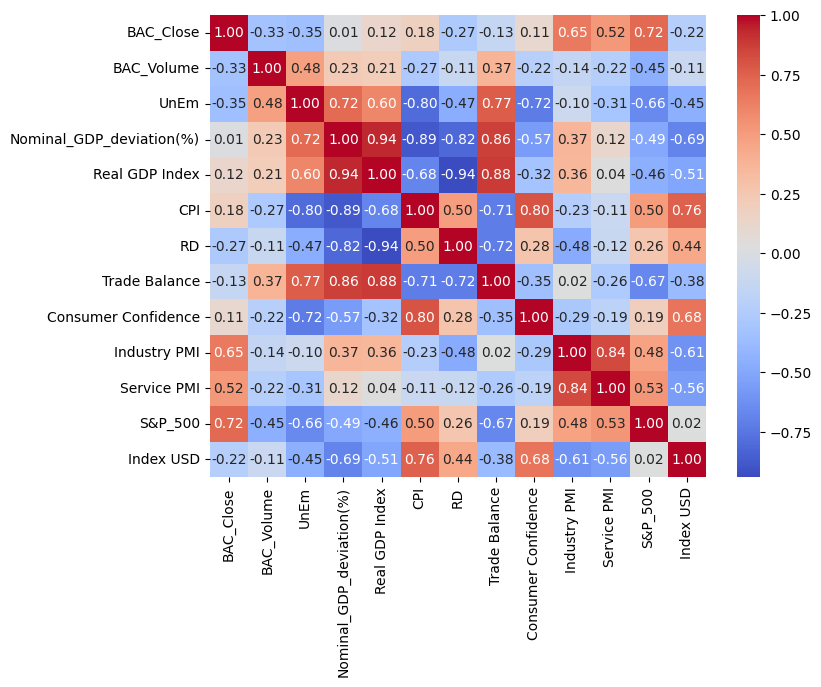

In [64]:
df = union_df.copy()
df = df.drop('Nominal GDP Index', axis = 1)
corr_BAC = df[['BAC_Close',
                     'BAC_Volume',
                     'UnEm',
                     'Nominal_GDP_deviation(%)',
                     'Real GDP Index',
                     'CPI',
                     'RD',
                     'Trade Balance',
                     'Consumer Confidence',
                     'Industry PMI',
                     'Service PMI',
                     'S&P_500',
                     'Index USD']].corr()



plt.figure(figsize=(8, 6))
sns.heatmap(corr_BAC, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

также инересным признком может стать день недели

## Тест Дики — Фуллера, проверка на стационарность, ACF

### Разложение STL компоненты


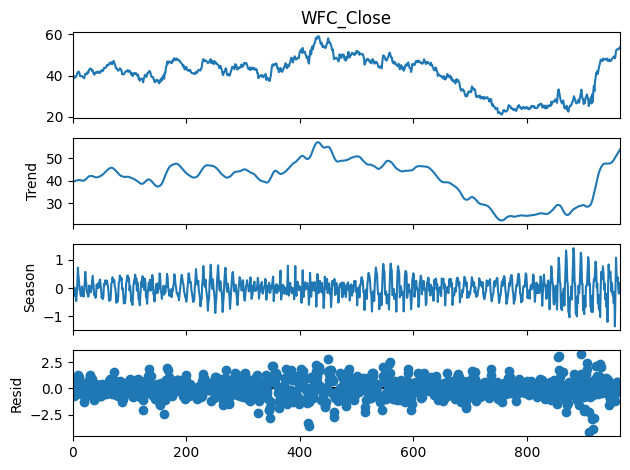

In [51]:
series = union_df['WFC_Close']


def decompose_time_series_stl(time_series):
    stl = STL(time_series, seasonal=13, period=13)
    result = stl.fit()
    fig = result.plot()
    plt.show()
    return result


stl_result = decompose_time_series_stl(series)
trend_component = stl_result.trend
seasonal_component = stl_result.seasonal
residual_component = stl_result.resid

### Функция для проведения теста Дики-Фуллера

In [52]:
def perform_adf_test(time_series):
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Ряд стационарен. Отвергаем гипотезу о нестационарности.")
    else:
        print("Ряд нестационарен. Гипотеза о нестационарности не может быть отвергнута.")

perform_adf_test(union_df['WFC_Close'])

ADF Statistic: -1.530268327206435
p-value: 0.5184884542739423
Critical Values: {'1%': -3.4372015433243797, '5%': -2.8645648359053517, '10%': -2.568380590610461}
Ряд нестационарен. Гипотеза о нестационарности не может быть отвергнута.


In [65]:
perform_adf_test(union_df['Citi_Close'])

ADF Statistic: -1.7741817974259606
p-value: 0.393352936400972
Critical Values: {'1%': -3.437215930951362, '5%': -2.864571180534198, '10%': -2.5683839700117868}
Ряд нестационарен. Гипотеза о нестационарности не может быть отвергнута.


In [66]:
perform_adf_test(union_df['JPM_Close'])

ADF Statistic: -1.6350006769625718
p-value: 0.4648742603093793
Critical Values: {'1%': -3.4372448882473177, '5%': -2.86458394997689, '10%': -2.5683907715382888}
Ряд нестационарен. Гипотеза о нестационарности не может быть отвергнута.


In [67]:
perform_adf_test(union_df['BAC_Close'])

ADF Statistic: -1.8904784103357284
p-value: 0.33655353942711674
Critical Values: {'1%': -3.4372015433243797, '5%': -2.8645648359053517, '10%': -2.568380590610461}
Ряд нестационарен. Гипотеза о нестационарности не может быть отвергнута.


Таким образом можно сделать вывод о том, что все четыре ряда нестационарны

### ACF